In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Display plots inline
%matplotlib inline

In [2]:
#Load the Mall-Customers dataset
df = pd.read_csv(r'C:\\Users\\sweet\\OneDrive - New England College\\Desktop\\DataScience\\Mall_Customers.csv')

In [3]:
#Display first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Provides overview of the dataset including column names, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Counts the missing values in each column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#Display basic summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


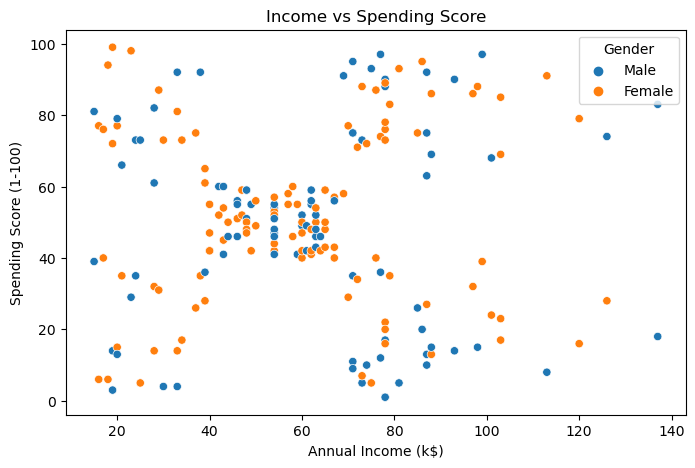

In [7]:
#Creating a Scatterplot to visualize Annual Income vs Spending Score of the customers
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.title("Income vs Spending Score")
plt.show()

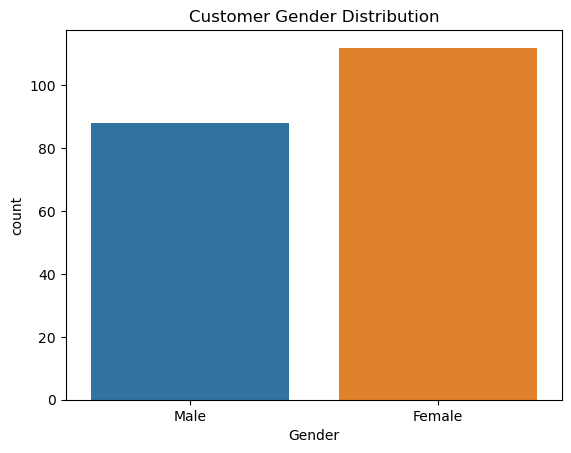

In [8]:
#Bar plots showing Gender distribution of the Customers
sns.countplot(x=df['Gender'])
plt.title("Customer Gender Distribution")
plt.show()

# Apply Unsupervised Machine Learning Algorithm - K-Means Clustering

In [9]:
#Extracting two important features for clustering
X =df[['Annual Income (k$)','Spending Score (1-100)']]

C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

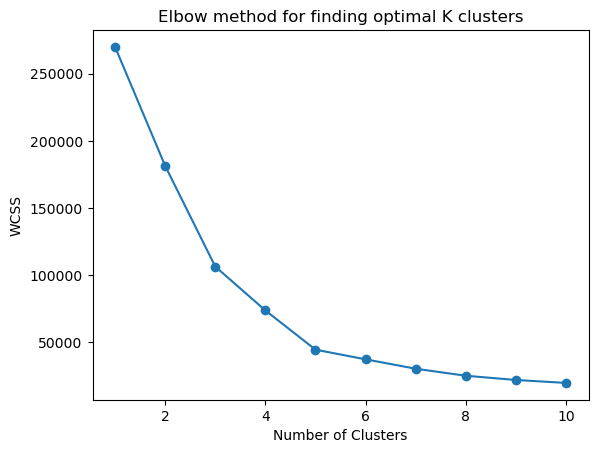

In [10]:
#Determine optimal number of Clusters utilizing elbow method
wcss = []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method for finding optimal K clusters')
plt.show()

In [11]:
#Train the K-Means model
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
5,6,Female,22,17,76,3
6,7,Female,35,18,6,2
7,8,Female,23,18,94,3
8,9,Male,64,19,3,2
9,10,Female,30,19,72,3


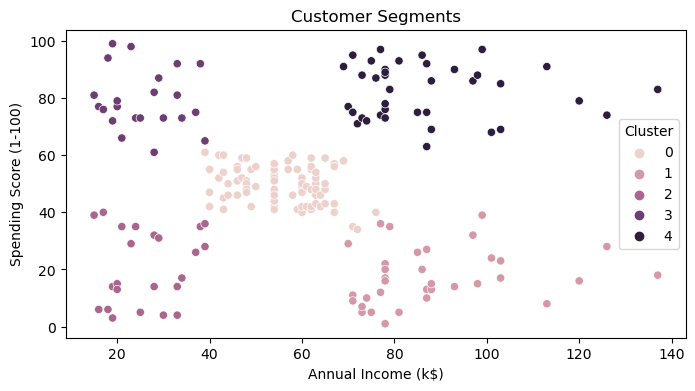

In [13]:
#Visualize the Clusters
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['Cluster'])
plt.title("Customer Segments")
plt.show()

# Conclusion


## Key Observations of the Clusters

The scatter plot visualizes customer segments based on Annual Income (x-axis) vs. Spending Score (y-axis), with different colors representing distinct clusters (0-4).

--Cluster 0 – Light Pink (Center)
Annual Income: $40k–$70k
Spending Score: 40–60
Customer Type: Balanced, Moderate Income & Spending
Comment: Steady, average customers with consistent spending habits.

--Cluster 1 – Rose/Pink (Bottom Right)
Annual Income: ≥ $75k
Spending Score: ≤ 40
Customer Type: High-Income, Low-Spending
Comment: Underutilized segment with potential to convert into higher spenders.

--Cluster 2 – Purple (Bottom Left)
Annual Income: ≤ $40k
Spending Score: ≤ 40
Customer Type: Budget-Conscious Shoppers
Comment: Price-sensitive group, least profitable; requires heavy incentives.

--Cluster 3 – Dark Purple (Top Left)
Annual Income: ≤ $40k
Spending Score: ≥ 60
Customer Type: Low-Income, High-Spending
Comment: Young, frequent buyers who shop despite limited income.

--Cluster 4 – Deep Dark Purple / Black (Top Right)
Annual Income: ≥ $70k
Spending Score: ≥ 60
Customer Type: Premium High-Value Customers
Comment: Wealthy and willing to spend; most profitable segment.

## Business Insights
--Cluster 4 (High Income, High Spending):
Focus on VIP treatment, loyalty rewards, and exclusive deals
Highest ROI segment for luxury and premium offerings

--Cluster 1 (High Income, Low Spending):
These customers have money but don’t spend much
Use personalized marketing, targeted promotions, or interest-based recommendations to unlock potential

--Cluster 3 (Low Income, High Spending):
Loyal spenders despite income limitations
Retain through affordable bundles, EMI plans, or cashback offers

--Cluster 0 (Balanced Income & Spending):
Maintain loyalty with seasonal discounts, email engagement, and small-value perks

--Cluster 2 (Low Income, Low Spending):
Least profitable but can be improved
Use heavy discounts, referral programs, or entry-level product promotions to engage.
 

## Recommendation to the company: 
--Segment-Based Targeting:
Tailor marketing efforts to the distinct behaviors of each cluster instead of using a one-size-fits-all approach.

--Upsell to Cluster 4:
These are the most valuable customers — invest in high-end campaigns and loyalty programs to retain and increase their lifetime value.

--Reactivate Cluster 1:
Explore why high-income customers are spending less — try lifestyle-oriented campaigns or highlight premium product benefits.

--Hold onto Cluster 3:
Since these customers already spend a lot, build budget-conscious loyalty offerings to keep them hooked.

--Incentivize Cluster 2:
Use gamified referral rewards or entry-level service packages to trigger spending from this cautious group.

--Maintain Cluster 0:
Keep them engaged with personalization, periodic check-ins, and relevant offers — they’re dependable.